In [168]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,precision_score,roc_curve,auc
import matplotlib.pyplot as plt
%matplotlib inline

# Answer 1

In [169]:
ds = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data")

In [170]:
ds.sample(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
127,phon_R01_S31_6,166.888,198.966,79.512,0.00638,0.00004,0.00368,0.00351,0.01104,0.02857,...,0.04641,0.01796,18.330,1,0.585169,0.736964,-5.825257,0.115697,1.996146,0.196535
158,phon_R01_S37_6,126.144,154.284,97.543,0.00975,0.00008,0.00593,0.00454,0.01778,0.02852,...,0.04499,0.03828,21.534,1,0.635015,0.627337,-5.070096,0.280091,2.892300,0.249703
188,phon_R01_S49_6,114.563,119.167,86.647,0.00327,0.00003,0.00146,0.00184,0.00439,0.01185,...,0.01672,0.00703,24.775,0,0.555303,0.659132,-6.710219,0.149694,1.913990,0.121777
187,phon_R01_S49_5,116.342,581.289,94.246,0.00267,0.00002,0.00115,0.00148,0.00345,0.01300,...,0.01892,0.00680,25.023,0,0.528485,0.663884,-6.359018,0.116636,2.152083,0.138868
115,phon_R01_S27_1,151.872,492.892,69.085,0.00856,0.00006,0.00404,0.00385,0.01211,0.01843,...,0.02389,0.06051,23.693,1,0.407701,0.662668,-4.673241,0.261549,2.702355,0.274407
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
153,phon_R01_S37_1,121.345,139.644,98.250,0.00684,0.00006,0.00388,0.00332,0.01164,0.02534,...,0.04019,0.04179,21.520,1,0.566867,0.670475,-4.865194,0.246404,2.013530,0.168581
54,phon_R01_S16_1,108.807,134.656,102.874,0.00761,0.00007,0.00349,0.00486,0.01046,0.02719,...,0.04450,0.01036,21.028,1,0.536009,0.819032,-4.649573,0.205558,1.986899,0.316700
136,phon_R01_S33_3,113.400,133.344,107.816,0.00451,0.00004,0.00219,0.00283,0.00658,0.04879,...,0.07154,0.02278,19.013,1,0.647900,0.708144,-4.378916,0.300067,2.445502,0.259451
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


# Answer 2

In [171]:
ds.shape

(195, 24)

In [172]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [173]:
ds.describe().T


,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


# Answer 3

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


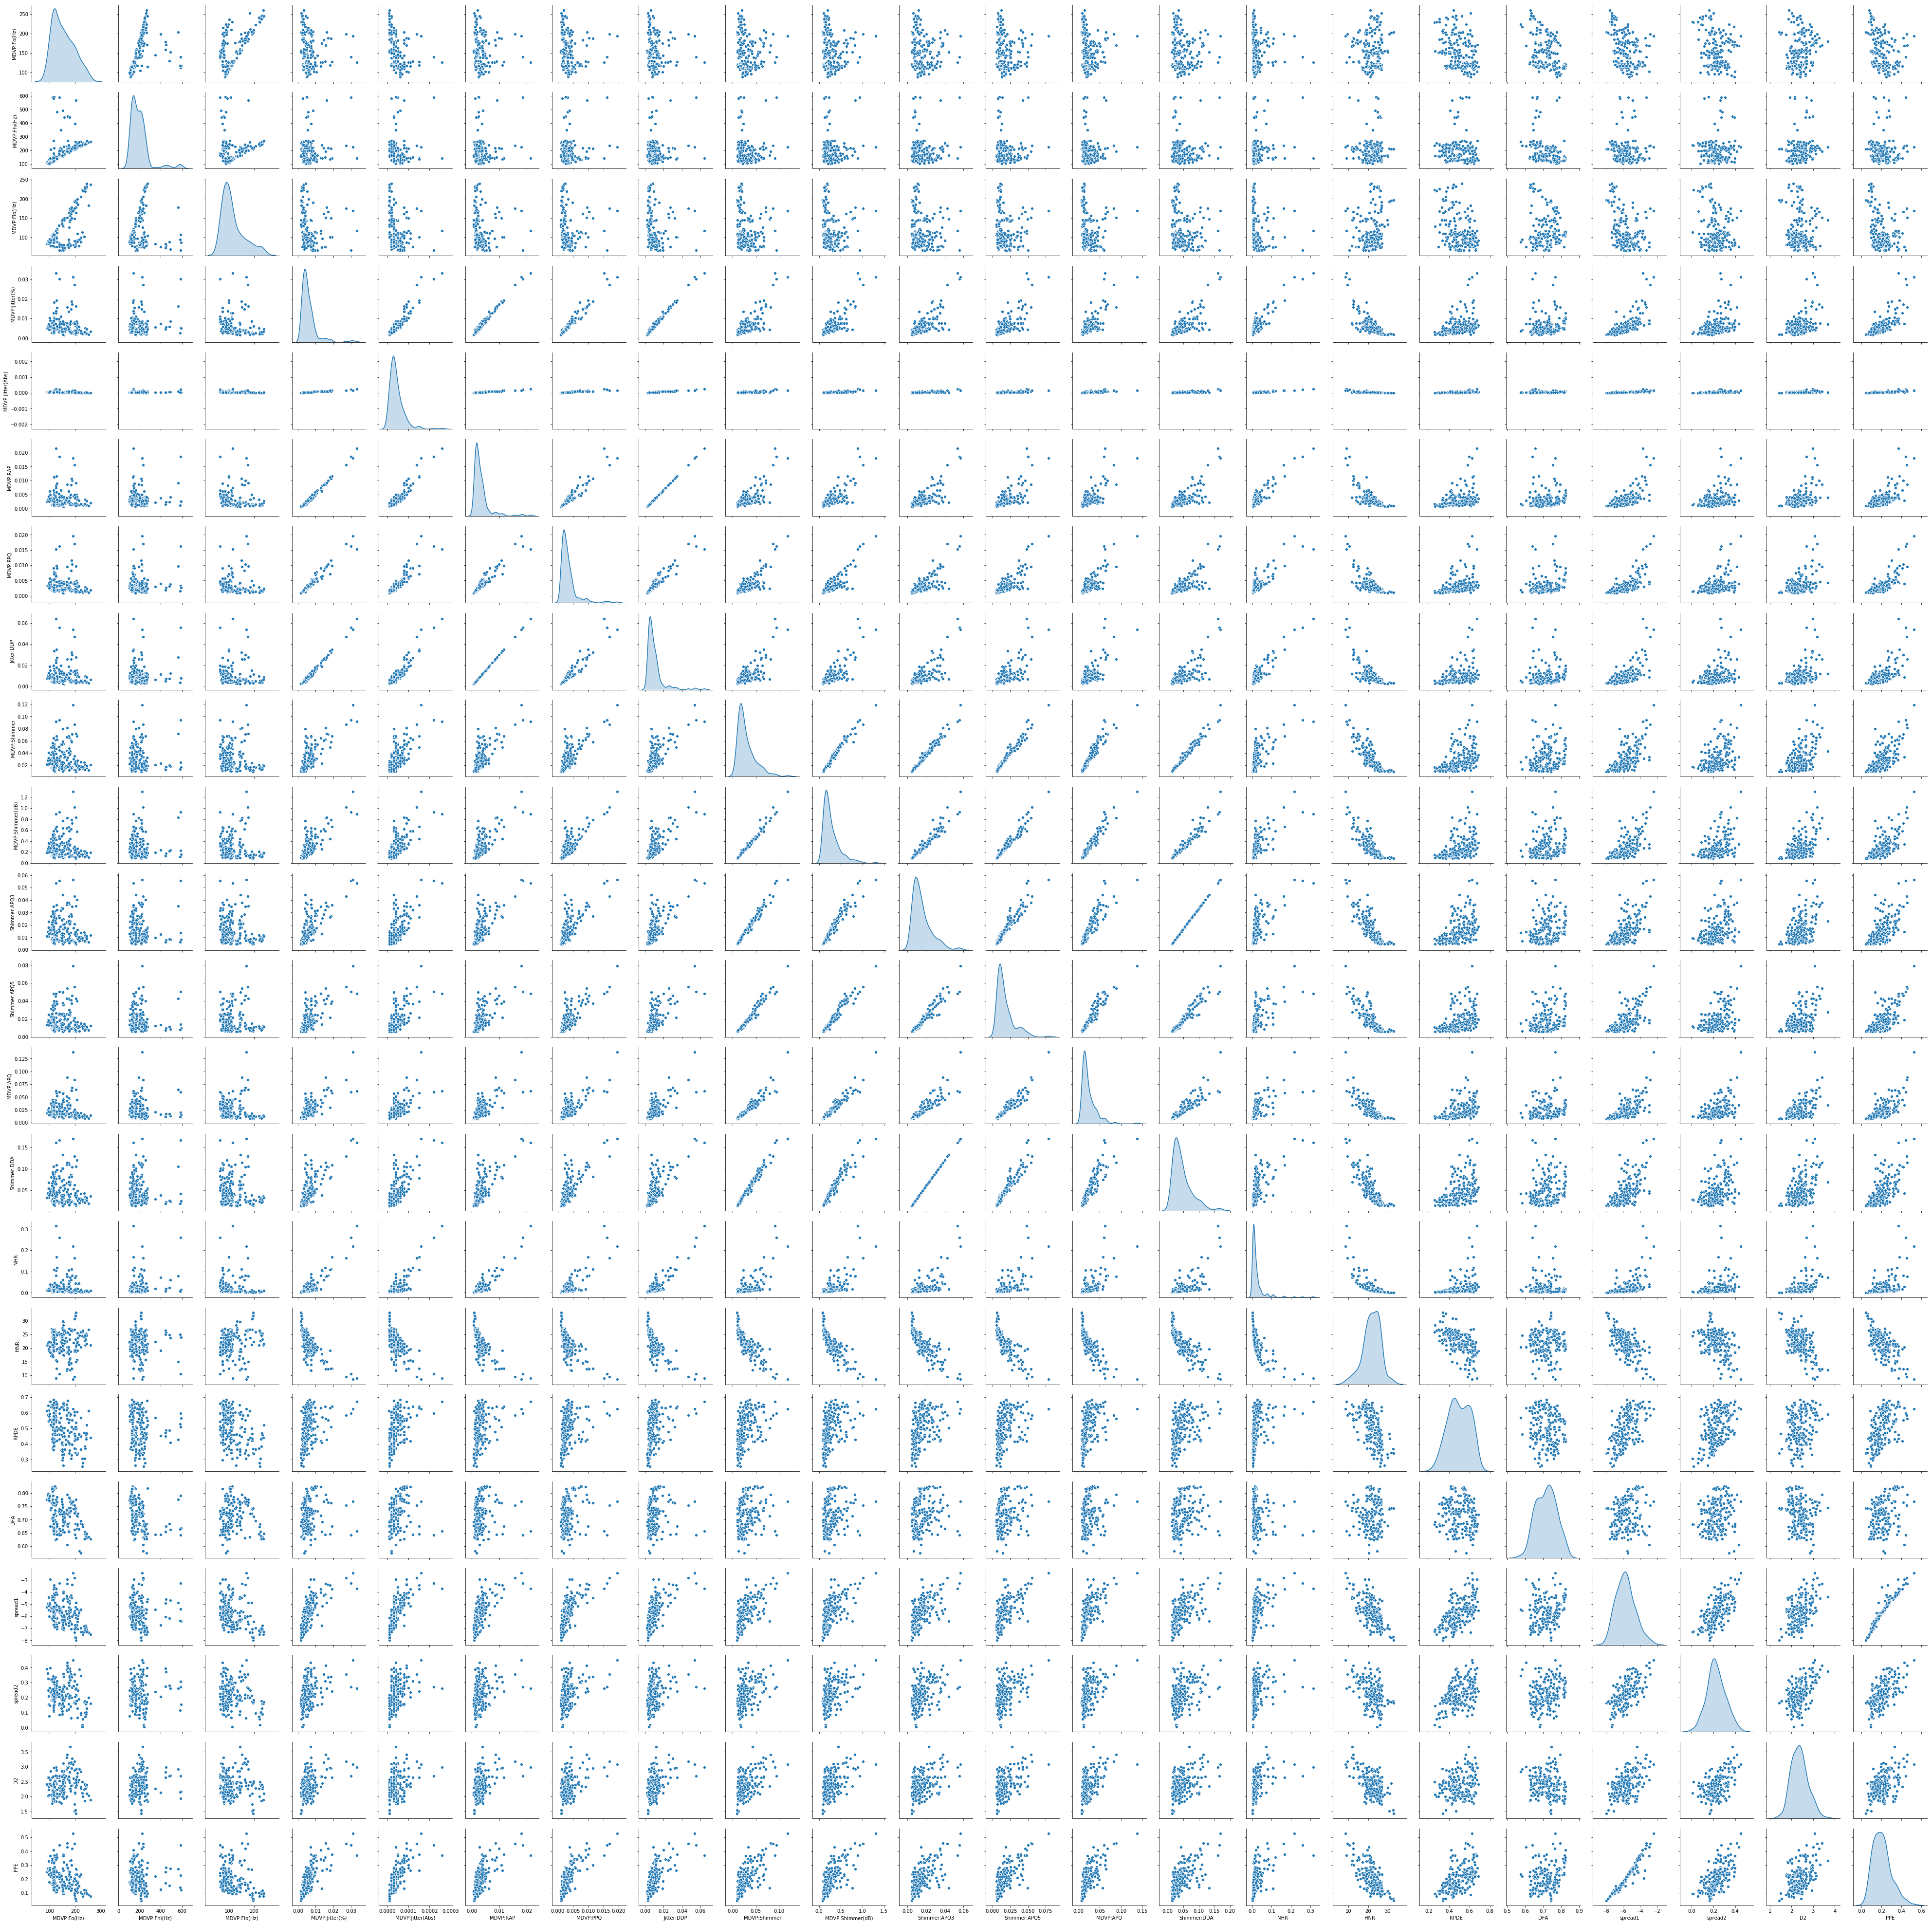

In [156]:
import seaborn as sns
sns.pairplot(ds, diag_kind='kde');

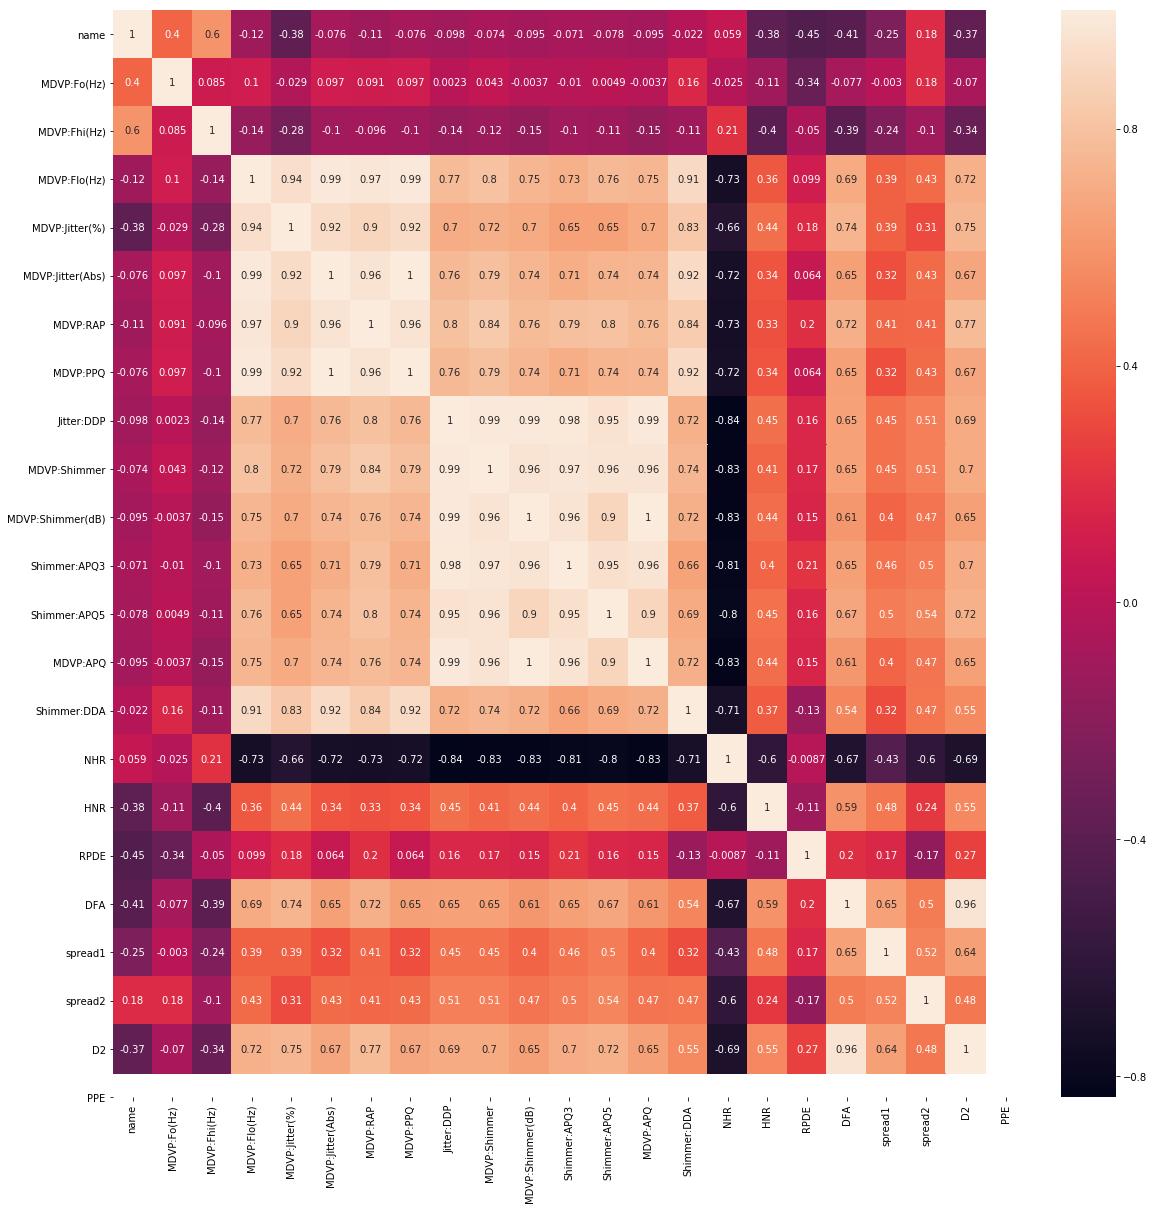

In [164]:
plt.figure(figsize=(20, 20))
sns.heatmap(ds.corr(),xticklabels = ds.columns.values,yticklabels = ds.columns.values,annot = True);

# Answer 4


In [5]:
x = ds.drop("status", axis=1)
x = x.drop("name", axis=1)
y = ds.pop("status")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                        random_state = 7)

# Answer 5

In [6]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [7]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Answer 6

In [8]:
y_predictTrain =dt_model.predict(x_train)

In [9]:
y_predictTest =dt_model.predict(x_test)

In [10]:
accuracy_score(y_test,y_predictTest)

0.8813559322033898

In [11]:
pd.crosstab(y_train,pd.Series(y_predictTrain),rownames=['Actual'],colnames=['Prediction'])

Prediction,0,1
Actual,,
0,4,15
1,22,54


# Answer 7

In [30]:
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy')
reg_dt_model.fit(x_train, y_train)
y_predictTest =reg_dt_model.predict(x_test)

In [31]:
accuracy_score(y_test,y_predictTest)

0.864406779661017

In [32]:
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3,min_samples_leaf=5)
reg_dt_model.fit(x_train, y_train)
y_predictTest =reg_dt_model.predict(x_test)

In [33]:
accuracy_score(y_test,y_predictTest)

0.9152542372881356

# Answer 8

In [142]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators =40)
rfcl = rfcl.fit(x_train, y_train)


In [143]:
y_predictTest = rfcl.predict(x_test)

In [144]:
accuracy_score(y_test,y_predictTest)

0.8983050847457628